In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [36]:
bf_g = np.genfromtxt('bf_g.csv', delimiter=",")
bf_im = np.genfromtxt('bf_im.csv', delimiter=",")
tr_g = np.genfromtxt('true_g.csv', delimiter=",")
tr_im = np.genfromtxt('true_im.csv', delimiter=",")

In [37]:
# genuine -- 
count_bf_g, bins_bf_g = np.histogram(bf_g)
count_tr_g, bins_tr_g = np.histogram(tr_g)
# impostor --
count_bf_im, bins_bf_im = np.histogram(bf_im)
count_tr_im, bins_tr_im = np.histogram(tr_im)

In [38]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

In [39]:
scount_bf_g = smooth(count_bf_g, 5)
scount_bf_im = smooth(count_bf_im, 5)
scount_tr_g = smooth(count_tr_g, 5)
scount_tr_im = smooth(count_tr_im, 5)

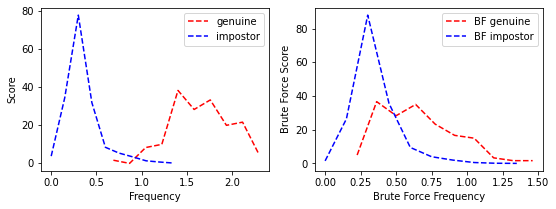

In [40]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(bins_tr_g[:-1], count_tr_g / 60*100, 'r--', bins_tr_im[:-1], count_tr_im / 3540*60, 'b--' )
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.legend(['genuine', 'impostor'])
plt.subplot(122)
plt.plot(bins_bf_g[:-1], count_bf_g / 60*100, 'r--', bins_bf_im[:-1], count_bf_im / 3540*60, 'b--' )
plt.xlabel('Brute Force Frequency')
plt.ylabel('Brute Force Score')
plt.legend(['BF genuine', 'BF impostor'])
plt.show()

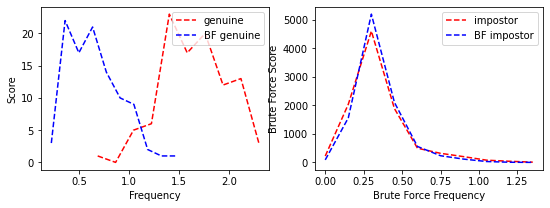

In [45]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(bins_tr_g[:-1], count_tr_g , 'r--', bins_bf_g[:-1], count_bf_g, 'b--' )
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.legend(['genuine', 'BF genuine'])
plt.subplot(122)
plt.plot(bins_tr_im[:-1], count_tr_im, 'r--', bins_bf_im[:-1], count_bf_im, 'b--' )
plt.xlabel('Brute Force Frequency')
plt.ylabel('Brute Force Score')
plt.legend(['impostor', 'BF impostor'])
plt.savefig('figures/blah.png')
plt.show()

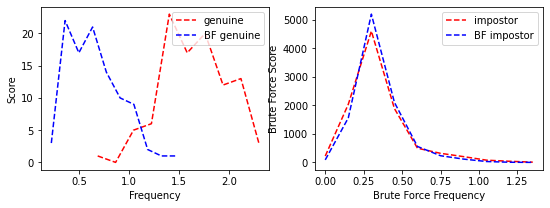

In [42]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(bins_tr_g[:-1], count_tr_g , 'r--', bins_bf_g[:-1], count_bf_g, 'b--' )
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.legend(['genuine', 'BF genuine'])
plt.subplot(122)
plt.plot(bins_tr_im[:-1], count_tr_im, 'r--', bins_bf_im[:-1], count_bf_im, 'b--' )
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.legend(['impostor', 'BF impostor'])
plt.show()

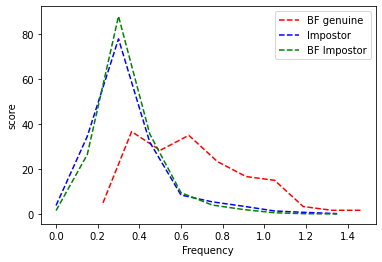

In [44]:
plt.plot(bins_bf_g[:-1], count_bf_g / 60*100, 'r--', bins_tr_im[:-1], count_tr_im / 3540*60, 'b--', bins_bf_im[:-1], count_bf_im / 3540*60, 'g--')
plt.xlabel('Frequency')
plt.ylabel('score')
plt.legend(['BF genuine', 'Impostor', 'BF Impostor'])
plt.show()